# GUTENBERG

1. **Data Fetching**: Use the `fetch_gutendex` function in `fetch_gutendex.py` to retrieve book data from the Gutendex API.
2. **Downloading Texts**: Utilize the `download_texts` function to download the text files of the books.
3. **Data Enrichment**: Enrich the book data using the functions in `ol_enrichment.py` to gather additional information from the Open Library API.
4. **Preprocessing**: Clean and normalize the downloaded text data with functions in `preprocessing.py`.
5. **Analysis**: Perform vectorization and k-NN analysis using `vectorize_and_knn.py` to find similar books.
6. **Graph Construction**: Build semantic and subject-based graphs with the functions in `graph_builder.py`.

## 0) Settings and configurations

In [1]:
# main.py
import pandas as pd
from config import (PREFERRED_MIME, OUT_DIR)
from fetch_gutendex import fetch_gutendex
from download_texts import download_texts
from ol_enrichment import enrich_openlibrary
from preprocessing import clean_texts
from vectorize_and_knn import vectorize_corpus, knn_edges
from graph_builder import build_semantic_graph, build_subject_graph

### 1) **Data Fetching**: Use the `fetch_gutendex` function in `fetch_gutendex.py` to retrieve book data from the Gutendex API.

In [2]:
# 1) Fetch Romance (EN, PD) from Gutendex
df = fetch_gutendex(PREFERRED_MIME, save_csv=True)
print(f"Gutendex rows: {len(df)}")

Gutendex(romance,en,PD=false): 32it [00:21,  1.46it/s]               

Gutendex rows: 30


### 2) **Downloading Texts**: Utilize the `download_texts` function to download the text files of the books.

In [3]:
# 2) Download texts (start with N to test quickly)
df = download_texts(df, limit=None)  # set limit=100 for a quick run
print("Downloaded:", df["local_path"].notna().sum())

Downloaded: 30


### 3) **Data Enrichment**: Enrich the book data using the functions in `ol_enrichment.py` to gather additional information from the Open Library API.

In [4]:
# 3) Enrich with Open Library
df = enrich_openlibrary(df, save_csv=True)
print("OL matched:", df["ol_work_key"].notna().sum())

OpenLibrary enrichment: 100%|██████████| 30/30 [00:45<00:00,  1.53s/it]

OL matched: 26


In [5]:
# print header dataframe df
df.head(5)

,pg_id,title,authors,download_count,languages,subjects,bookshelves,chosen_mime,text_url,local_path,ol_work_key,ol_title,ol_author_name,ol_first_publish_year,ol_subjects,ol_edition_count,ol_languages,ol_match_score
0,1513,Romeo and Juliet,"[Shakespeare, William]",87684,[en],"[Conflict of generations -- Drama, Juliet (Fic...","[Category: British Literature, Category: Class...",text/html,https://www.gutenberg.org/ebooks/1513.html.images,data/texts/pg_1513_Romeo_and_Juliet.txt,/works/OL362427W,Romeo and Juliet,[William Shakespeare],1597.0,"[Classical Literature, British and irish drama...",975.0,"[kor, pol, hin, ara, ukr, ben, cat, jpn, srp, ...",0.893684
1,1342,Pride and Prejudice,"[Austen, Jane]",76463,[en],"[Courtship -- Fiction, Domestic fiction, Engla...","[Best Books Ever Listings, Category: British L...",text/html,https://www.gutenberg.org/ebooks/1342.html.images,data/texts/pg_1342_Pride_and_Prejudice.txt,/works/OL66554W,Pride and Prejudice,[Jane Austen],1813.0,"[Fiction, Romance, Historical, Regency, Britis...",4036.0,"[kor, hin, pol, jpn, srp, vie, tam, mul, ind, ...",0.883636
2,2641,A Room with a View,"[Forster, E. M. (Edward Morgan)]",57628,[en],"[British -- Italy -- Fiction, England -- Ficti...","[Category: British Literature, Category: Novel...",text/html,https://www.gutenberg.org/ebooks/2641.html.images,data/texts/pg_2641_A_Room_with_a_View.txt,/works/OL88813W,A Room with a View,[E. M. Forster],1905.0,"[British, Fiction, Young women, British in fic...",185.0,"[eng, spa, chi, fre, ita]",0.836667
3,67979,The Blue Castle: a novel,"[Montgomery, L. M. (Lucy Maud)]",47359,[en],"[Canada -- History -- 1914-1945 -- Fiction, Ch...","[Category: Novels, Category: Romance]",text/html,https://www.gutenberg.org/ebooks/67979.html.im...,data/texts/pg_67979_The_Blue_Castle_a_novel.txt,/works/OL43111508W,The Blue Castle A Novel,[Lucy Maud Montgomery],1926.0,None,1.0,[eng],0.856364
4,1260,Jane Eyre: An Autobiography,"[Brontë, Charlotte]",41093,[en],"[Bildungsromans, Charity-schools -- Fiction, C...","[Category: British Literature, Category: Class...",text/html,https://www.gutenberg.org/ebooks/1260.html.images,data/texts/pg_1260_Jane_Eyre_An_Autobiography.txt,/works/OL25964294W,Jane Eyre : an Autobiography,"[Charlotte Brontë, Charlotte Brontë]",2009.0,None,8.0,[eng],0.888750


### 4) **Preprocessing**: Clean and normalize the downloaded text data with functions in `preprocessing.py`.

In [6]:
# 4) Preprocess texts
df = clean_texts(df)
print("Cleaned:", df["clean_path"].notna().sum())
df.to_csv(OUT_DIR / "master_table.csv", index=False)

Cleaning texts: 100%|██████████| 30/30 [00:05<00:00,  5.62it/s]

Cleaned: 30


### 5) **Analysis**: Perform vectorization and k-NN analysis using `vectorize_and_knn.py` to find similar books.

In [7]:
# 5) Vectorize + kNN (semantic)
have_text = df["clean_path"].notna()
X, vect, ids = vectorize_corpus(df[have_text])
edges = knn_edges(X, list(df[have_text].index))

Reading cleaned texts: 100%|██████████| 30/30 [00:00<00:00, 1706.78it/s]


### 6) **Graph Construction**: Build semantic and subject-based graphs with the functions in `graph_builder.py`.

In [8]:
# 6) Build graphs
G_sem = build_semantic_graph(df, edges)
G_tag = build_subject_graph(df)

print("Semantic:", G_sem.number_of_nodes(), "nodes,", G_sem.number_of_edges(), "edges")
print("Subjects:", G_tag.number_of_nodes(), "nodes,", G_tag.number_of_edges(), "edges")

Semantic: 30 nodes, 67 edges
Subjects: 30 nodes, 10 edges


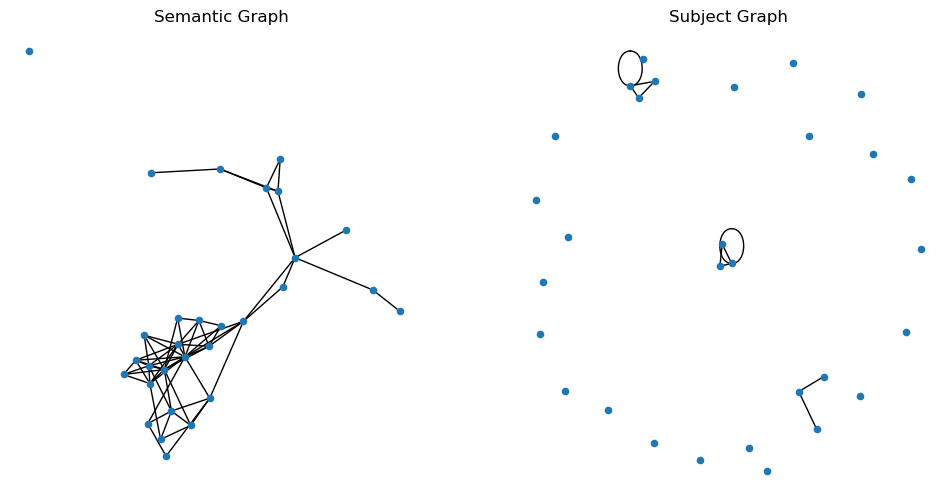

In [11]:
# plot graphs (optional)
import matplotlib.pyplot as plt
import networkx as nx
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Semantic Graph")
pos = nx.spring_layout(G_sem, seed=42)
nx.draw(G_sem, pos, node_size=20, arrows=True, arrowsize=5)
plt.subplot(1, 2, 2)
plt.title("Subject Graph")
pos = nx.spring_layout(G_tag, seed=42)
nx.draw(G_tag, pos, node_size=20, arrows=True, arrowsize=5)
plt.show()